---
title: '빅분기 실기 - 2유형 문제풀이(1)'
author: 'Hyunsoo Kim'
date: '2023-10-22'
categories: [Python, Pandas, Numpy, sklearn]
jupyter: python3
page-layout: full
---

> 실기 2 유형(1)

- 출처 : [MetaCodeM](https://www.youtube.com/watch?v=jqRA33xb5aY&t=255s)
- 참고 : [시험환경 체험](https://dataq.goorm.io/exam/116674/%EC%B2%B4%ED%97%98%ED%95%98%EA%B8%B0/quiz/4)

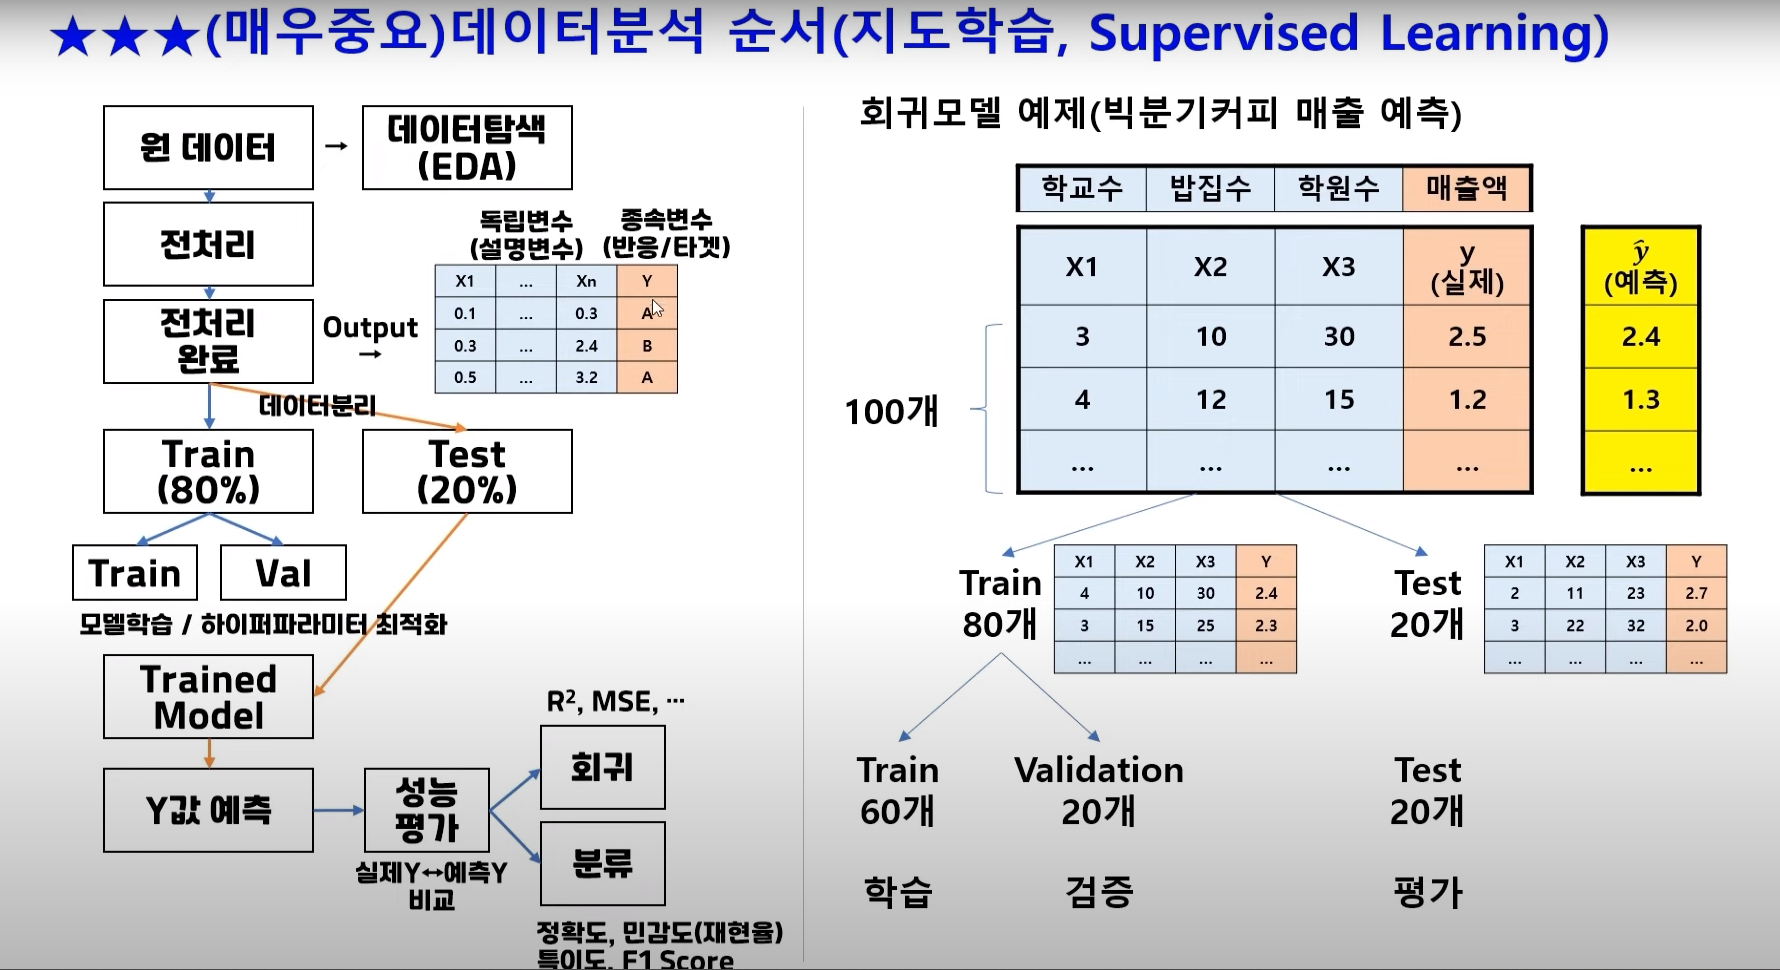

In [3]:
# !pip install IPython
from IPython.display import Image
Image('실기_2(1).png')

|회차|분류or회귀|성능지표|
|-----|----|---|
|6회|분류|macro F1 score|
|5회|회귀|RMSE|
|4회|분류|macro F1 score|
|3회|분류|Accuracy|
|2회|분류|AUC|

지도학습만 현재까지 나옴

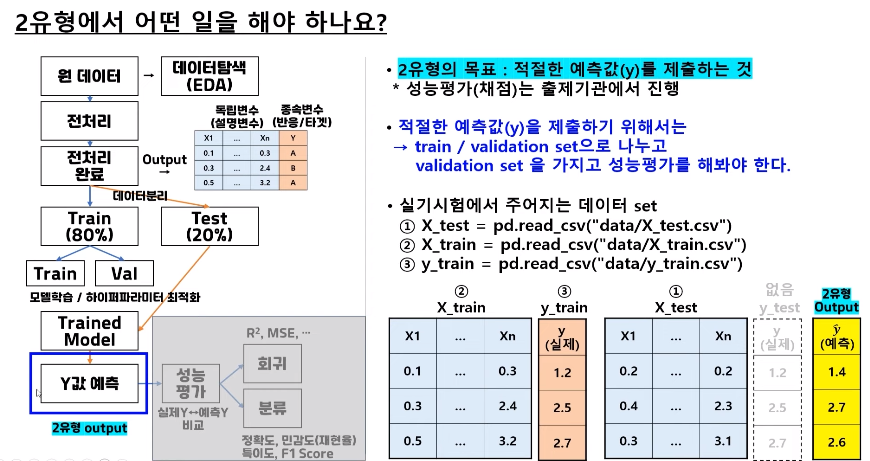

In [6]:
Image('실기_2(2).png')

# 2유형 문제풀이(1)

## 제2유형_연습하기_와인종류분류

## &#9989; 데이터 분석 분서
### 1. 라이브러리 및 데이터 확인
### 2. 데이터 탐색(EDA)
### 3. 데이터 전처리 및 분리
### 4. 모델링 및 성능평가
### 5. 예측값 제출

## &#9989; 1. 라이브러리 및 데이터 확인

In [1]:
import pandas as pd
import numpy as np

In [2]:
####### 실기환경 복사 영역 #######
import pandas as pd
import numpy as np
# 실기 시험 데이터셋으로 세팅하기 (수정금지)

from sklearn.datasets import load_wine
# 와인 데이터셋을 로드합니다
wine = load_wine()
x = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target)

# 실기 시험 데이터셋으로 세팅하기 (수정금지)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                   stratify=y,
                                                   random_state=2023)
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_test.reset_index()
y_train.columns = ['target']
####### 실기환경 복사 영역 #######

🍷 와인의 종류를 분류해보자

- 데이터의 결측치, 이상치에 대해 처리하고
- 분류모델을 사용하여 정확도, F1 score, AUC 값을 산출하시오
- 제출은 result 변수에 담아 양식에 맞게 제출하시오

In [6]:
# 데이터 설명
# print(wine.DESCR)

## &#9989; 2. 데이터 탐색(EDA)

In [3]:
# 데이터 행/열 확인
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(142, 13)
(36, 13)
(142, 1)


In [4]:
# 초기 데이터 확인
print(x_train.head(3))
print(x_test.head(3))
print(y_train.head(3))

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
52     13.82        1.75  2.42               14.0      111.0           3.88   
146    13.88        5.04  2.23               20.0       80.0           0.98   
44     13.05        1.77  2.10               17.0      107.0           3.00   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
52         3.74                  0.32             1.87             7.05  1.01   
146        0.34                  0.40             0.68             4.90  0.58   
44         3.00                  0.28             2.03             5.04  0.88   

     od280/od315_of_diluted_wines  proline  
52                           3.26   1190.0  
146                          1.33    415.0  
44                           3.35    885.0  
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
168    13.58        2.58  2.69               24.5      105.0           1.55   
144    12.25        

In [5]:
# 변수명과 데이터 타입이 매칭이 되는지, 결측치가 있는지 확인
print(x_train.info())
print(x_test.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 52 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
dtypes: f

In [6]:
# x_train과 x_test 데이터의 기초통계량을 잘 비교해보세요
print(x_train.describe())
print(x_test.describe())
print(y_train.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    13.025915    2.354296    2.340211          19.354225   98.732394   
std      0.812423    1.142722    0.279910           3.476825   13.581859   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.370000    1.610000    2.190000          16.800000   88.000000   
50%     13.050000    1.820000    2.320000          19.300000   97.000000   
75%     13.685000    3.115000    2.510000          21.500000  106.750000   
max     14.830000    5.800000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.303592    2.043592              0.361479         1.575070   
std         0.633955    1.033597              0.124627         0.576798   
min         0.9

In [7]:
# y 데이터도 구체적으로 살펴볼 필요있음
print(y_train.head())

print(y_train.value_counts())

     target
52        0
146       2
44        0
67        1
43        0
target
1         57
0         47
2         38
dtype: int64


## &#9989; 3. 데이터 전처리 및 분리

### 1) 결측치, 2) 이상치, 3) 변수 처리하기

In [8]:
# 결측치 확인
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64
target    0
dtype: int64


In [9]:
# 결측치 제거
# df = df.dropna()
# print(df)

# 참고사항
# print(df.dropna().shape) # 행기준으로 삭제

In [10]:
# 결측치 대체(평균값, 중앙값, 최빈값)
# 연속형 변수 : 중앙값, 평균값
#     - df['변수명'].median()
#     - df['변수명'].mean()
# 범주형 변수 : 최빈값

# df['변수명'] = df['변수명'].fillna(대체할 값)

In [11]:
# 이상치 대체(예시)
# df['변수명'] = np.where(df['변수명']>=5, 대체할 값, df['변수명'])

In [12]:
# 변수처리

# 불필요한 변수 제거
# df = df.drop(columns = ['변수1', '변수2'])
# df = df.drop(['변수1', '변수2'], axis=1)

# 필요시 변수 추가(파생변수 생성)
# df['파생변수명'] = df['A'] * df['B'] (파생변수 생성 수식)

# 원핫인코딩(가변수 처리)
# x_train = pd.get_dummies(x_train)
# x_test = pd.get_dummies(x_test)
# print(x_train.info())
# print(x_test.info())

### 데이터 분리

In [13]:
# 데이터를 훈련 세트와 검증용 세트로 분할 (80% 훈련, 20% 검증용)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train['target'],
                                                   test_size = 0.2,
                                                   stratify = y_train['target'],
                                                   random_state = 2023)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(113, 13)
(29, 13)
(113,)
(29,)


## &#9989; 4. 모델링 및 성능평가

In [14]:
# 랜덤포레스트 모델 사용 (참고: 회귀모델은 RandomForestRegressor)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
# 모델을 사용하여 테스트 데이터 예측
y_pred = model.predict(x_val)

In [16]:
# 모델 성늘 평가 (정확도, F1 score, 민감도, 특이도 등)
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
acc = accuracy_score(y_val, y_pred)              # (실제값, 예측값)
f1 = f1_score(y_val, y_pred, average = 'macro')  # (실제값, 예측값)
# auc = roc_auc_score(y_val, y_pred)             # (실제값, 예측값)  * AUC는 이진분류

In [17]:
# 정확도(Accuracy)
print(acc)

1.0


In [18]:
# macro f1 score
print(f1)

1.0


## &#9989; 5. 예측값 제출

### (주의) test 셋을 모델에 넣어 나온 예측값을 제출해야함

In [19]:
# (실기시험 안내사항)
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({ 'result':y_result }).to_csv('수험번호_csv', index=False)

# 모델을 사용하여 테스트 데이터 예측

# 1. 특정 클래스로 분류할 경우 (predict)
y_result = model.predict(x_test)
print(y_result[:5])

# 2. 특정 클래스로 분류될 확률을 구할 경우 (predict_proba)
y_result_prob = model.predict_proba(x_test)
print(y_result_prob[:5])

# 이해해보기
result_prob = pd.DataFrame({
    'result' : y_result,
    'prob_0' : y_result_prob[:, 0],
    'prob_1' : y_result_prob[:, 1],
    'prob_2' : y_result_prob[:, 2],
})
# Class 0일 확률 : y_result_prob[:, 0]
# Class 1일 확률 : y_result_prob[:, 1]
# Class 2일 확률 : y_result_prob[:, 2]

print(result_prob[:5])

[2 2 2 0 1]
[[0.01 0.05 0.94]
 [0.13 0.17 0.7 ]
 [0.   0.08 0.92]
 [0.99 0.01 0.  ]
 [0.08 0.81 0.11]]
   result  prob_0  prob_1  prob_2
0       2    0.01    0.05    0.94
1       2    0.13    0.17    0.70
2       2    0.00    0.08    0.92
3       0    0.99    0.01    0.00
4       1    0.08    0.81    0.11
